# Our Dataset

Collecting beer recipes for machine learning

## Outline
_Done_
* What we want to know about beer
* What beer data is out there
* What is beerXML
  * Load and print a beerXML file
  * Compare brewtoad and brewersfriend: presence/absense of tags
* How much did we get
  * Count recipes
* How did we represent it
  * Print a DataFrame  
* What does the beer recipe landscape look like
  * \# recipes/styles
  * what's cloned the most often?
  * most common malt, hop, yeast names
  * batch sizes
* Sneak preview: beer measurables (IBU, ABV, SRM)

In [59]:
import glob
import os
import pandas as pd
import pickle
import re

from collections import defaultdict
from lxml import etree
from pprint import pprint

from beerai.config import DATA_DIR

### Brewtoad

In [2]:
recipes_folder = os.path.join(DATA_DIR, "raw/recipes/brewtoad/")
files = glob.glob(recipes_folder + "*snpa*")
files[0:50]

['/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-10gal-mash-version.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-clone-2011-01-01-version.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-32.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-31.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-3.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-clone-46.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-ish.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-clone-22.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/marmot-ipa-snpa-clone.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-clone.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-clone-31.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-20.xml',
 '/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpa-c

In [3]:
bt_snpa_example = os.path.join(DATA_DIR, "raw/recipes/brewtoad/snpaclone.xml")

In [4]:
with open(bt_snpa_example, "r") as f:
    beerxml = f.read()

In [5]:
pprint(beerxml)

('<?xml version="1.0" encoding="UTF-8"?>\n'
 '<RECIPES>\n'
 '  <RECIPE>\n'
 '    <NAME>SNPAclone</NAME>\n'
 '    <STYLE>\n'
 '      <STYLE_GUIDE>BJCP</STYLE_GUIDE>\n'
 '      <VERSION>1</VERSION>\n'
 '      <NAME>American Pale Ale</NAME>\n'
 '      <STYLE_LETTER>A</STYLE_LETTER>\n'
 '      <CATEGORY_NUMBER>10</CATEGORY_NUMBER>\n'
 '      <TYPE>Ale</TYPE>\n'
 '      <OG_MIN>1.045</OG_MIN>\n'
 '      <OG_MAX>1.06</OG_MAX>\n'
 '      <FG_MIN>1.01</FG_MIN>\n'
 '      <FG_MAX>1.015</FG_MAX>\n'
 '      <IBU_MIN>30.0</IBU_MIN>\n'
 '      <IBU_MAX>45.0</IBU_MAX>\n'
 '      <COLOR_MIN>5.0</COLOR_MIN>\n'
 '      <COLOR_MAX>14.0</COLOR_MAX>\n'
 '      <ABV_MIN>4.5</ABV_MIN>\n'
 '      <ABV_MAX>6.2</ABV_MAX>\n'
 '    </STYLE>\n'
 '    <FERMENTABLES>\n'
 '      <FERMENTABLE>\n'
 '        <NAME>2-Row (US)</NAME>\n'
 '        <ORIGIN></ORIGIN>\n'
 '        <TYPE>Base Malt</TYPE>\n'
 '        <YIELD>79.89635068019865</YIELD>\n'
 '        <AMOUNT>4.535923700000001</AMOUNT>\n'
 '        <DISPLAY_AMOUNT>

In [6]:
xml = etree.parse(bt_snpa_example)
for e in xml.iter():
    print(xml.getpath(e))

/RECIPES
/RECIPES/RECIPE
/RECIPES/RECIPE/NAME
/RECIPES/RECIPE/STYLE
/RECIPES/RECIPE/STYLE/STYLE_GUIDE
/RECIPES/RECIPE/STYLE/VERSION
/RECIPES/RECIPE/STYLE/NAME
/RECIPES/RECIPE/STYLE/STYLE_LETTER
/RECIPES/RECIPE/STYLE/CATEGORY_NUMBER
/RECIPES/RECIPE/STYLE/TYPE
/RECIPES/RECIPE/STYLE/OG_MIN
/RECIPES/RECIPE/STYLE/OG_MAX
/RECIPES/RECIPE/STYLE/FG_MIN
/RECIPES/RECIPE/STYLE/FG_MAX
/RECIPES/RECIPE/STYLE/IBU_MIN
/RECIPES/RECIPE/STYLE/IBU_MAX
/RECIPES/RECIPE/STYLE/COLOR_MIN
/RECIPES/RECIPE/STYLE/COLOR_MAX
/RECIPES/RECIPE/STYLE/ABV_MIN
/RECIPES/RECIPE/STYLE/ABV_MAX
/RECIPES/RECIPE/FERMENTABLES
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/NAME
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/ORIGIN
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/TYPE
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/YIELD
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/AMOUNT
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/DISPLAY_AMOUNT
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/POTENTIAL
/RECI

Original Ken Grossman recipe: https://sierranevada.com/blog/pale-ale-homebrew-recipe/

### Brewers' Friend

In [7]:
recipes_folder = os.path.join(DATA_DIR, "raw/recipes/brewersfriend/")
files = glob.glob(recipes_folder + "*")

In [8]:
recipes_h5 = os.path.join(DATA_DIR, "interim/all_recipes.h5")
with pd.HDFStore(recipes_h5) as store:
    core = store.select(key="/core")

In [9]:
clones = core[core.name.str.contains("clone")].name

In [10]:
clone_words = pd.Series([item for sublist in list(clones.str.split()) for item in sublist])

In [11]:
clone_words.value_counts().head(40)

clone       13586
ale          1381
ipa          1200
-             789
clone)        558
stout         544
pale          503
the           410
sierra        379
nevada        361
stone         346
porter        327
pliny         326
red           297
hearted       282
version)      273
two           243
dust          232
elder         230
zombie        224
brown         213
2             206
black         206
old           201
fat           196
blue          190
tire          188
extract       186
moon          182
(clone)       180
bastard       178
head          174
amber         169
bell's        157
white         156
hop           156
milk          150
of            146
1             145
double        142
dtype: int64

In [12]:
bf_snpa = core[(core.origin == "brewersfriend") & (core.name.str.contains("snpa"))]

In [13]:
bf_snpa

,batch_size,boil_size,boil_time,brewer,efficiency,name,origin,recipe_file,src_abv,src_color,src_fg,src_ibu,src_og,style_category,style_guide,style_name,style_version
id,,,,,,,,,,,,,,,,,
333780,5.800000,8.500000,60.0,NaN,0.80,snpa,brewersfriend,recipes/brewersfriend/266866.xml,5.47,9.42,1.011,42.39,1.053,10a,bjcp,american pale ale,1.0
344204,41.639530,47.620480,60.0,NaN,0.80,snpa 10 gal,brewersfriend,recipes/brewersfriend/303792.xml,5.65,9.05,1.010,43.06,1.053,10a,bjcp,american pale ale,1.0
346531,22.712471,28.390588,60.0,my adv / ozarks mountain brew,0.76,snpa clone,brewersfriend,recipes/brewersfriend/232281.xml,5.36,7.49,1.009,37.92,1.050,10a,bjcp,american pale ale,1.0
349787,18.927059,28.390588,60.0,aih,0.70,snpa,brewersfriend,recipes/brewersfriend/417766.xml,5.72,8.02,1.012,63.78,1.056,10a,bjcp,american pale ale,1.0
351027,20.000000,12.000000,60.0,NaN,0.70,snpa clone keg,brewersfriend,recipes/brewersfriend/335632.xml,5.57,13.20,1.008,28.17,1.051,18b,bjcp,american pale ale,1.0
354349,20.819765,28.390588,60.0,NaN,0.75,snpa clone,brewersfriend,recipes/brewersfriend/125052.xml,5.89,7.62,1.015,55.23,1.060,10a,bjcp,american pale ale,1.0
358117,18.000000,25.000000,60.0,NaN,0.64,snpa,brewersfriend,recipes/brewersfriend/545021.xml,5.40,9.46,1.013,44.24,1.054,18b,bjcp,american pale ale,1.0
381521,22.000000,26.500000,90.0,NaN,0.75,toms snpa clone (fwh),brewersfriend,recipes/brewersfriend/449635.xml,5.30,8.01,1.012,55.88,1.053,10a,bjcp,american pale ale,1.0
385308,11.356235,13.248941,40.0,NaN,0.80,snpa clone-ish,brewersfriend,recipes/brewersfriend/1012.xml,5.31,6.13,1.013,58.47,1.053,10a,bjcp,american pale ale,1.0


In [14]:
core.origin.value_counts()

brewtoad         330790
brewersfriend     72367
Name: origin, dtype: int64

In [15]:
bf_snpa_example = os.path.join(DATA_DIR, "raw/recipes/brewersfriend/232281.xml")

In [16]:
with open(bf_snpa_example, "r") as f:
    bf_snpa_beerxml = f.read()

In [17]:
pprint(bf_snpa_beerxml)

('<?xml version="1.0" encoding="UTF-8"?>\n'
 '<RECIPES>\n'
 ' <RECIPE>\n'
 '  <NAME>SNPA Clone</NAME>\n'
 '  <VERSION>1</VERSION>\n'
 '  <TYPE>All Grain</TYPE>\n'
 '  <BREWER>MY ADV / Ozarks Mountain Brew</BREWER>\n'
 '  <DISPLAY_BATCH_SIZE>6 gal</DISPLAY_BATCH_SIZE>\n'
 '  <DISPLAY_BOIL_SIZE>7.5 gal</DISPLAY_BOIL_SIZE>\n'
 '  <BATCH_SIZE>22.71247068</BATCH_SIZE>\n'
 '  <BOIL_SIZE>28.39058835</BOIL_SIZE>\n'
 '  <BOIL_TIME>60</BOIL_TIME>\n'
 '  <EFFICIENCY>76</EFFICIENCY>\n'
 '  <NOTES>Water Needed. 8.71 gallons in to kettle. Single infusion no '
 'sparge.  Filled to 8.75 set boil to med to hard and had 6 gallons into '
 'fermenter with no loss.&#13;\n'
 '&#13;\n'
 'No squeeze bag: Hang and drip. Place drippings back into kettle before boil. '
 '&#13;\n'
 '&#13;\n'
 'Ambient Temp = 68F&#13;\n'
 'Estimated Strike Temp: 158.47F&#13;\n'
 'Real Strike Temp Should be: 155F&#13;\n'
 '60 min rest at 153F&#13;\n'
 '&#13;\n'
 'Hop Addition: 0 Min = Flame out&#13;\n'
 'Dry Hop: After primary ferm

In [18]:
xml = etree.parse(bf_snpa_example)
for e in xml.iter():
    print(xml.getpath(e))

/RECIPES
/RECIPES/RECIPE
/RECIPES/RECIPE/NAME
/RECIPES/RECIPE/VERSION
/RECIPES/RECIPE/TYPE
/RECIPES/RECIPE/BREWER
/RECIPES/RECIPE/DISPLAY_BATCH_SIZE
/RECIPES/RECIPE/DISPLAY_BOIL_SIZE
/RECIPES/RECIPE/BATCH_SIZE
/RECIPES/RECIPE/BOIL_SIZE
/RECIPES/RECIPE/BOIL_TIME
/RECIPES/RECIPE/EFFICIENCY
/RECIPES/RECIPE/NOTES
/RECIPES/RECIPE/PRIMARY_TEMP
/RECIPES/RECIPE/EST_COLOR
/RECIPES/RECIPE/IBU
/RECIPES/RECIPE/IBU_METHOD
/RECIPES/RECIPE/EST_ABV
/RECIPES/RECIPE/EST_OG
/RECIPES/RECIPE/EST_FG
/RECIPES/RECIPE/OG
/RECIPES/RECIPE/FG
/RECIPES/RECIPE/PRIMING_SUGAR_NAME
/RECIPES/RECIPE/CARBONATION_USED
/RECIPES/RECIPE/BF_PRIMING_METHOD
/RECIPES/RECIPE/BF_PRIMING_AMOUNT
/RECIPES/RECIPE/BF_CO2_LEVEL
/RECIPES/RECIPE/BF_CO2_UNIT
/RECIPES/RECIPE/URL
/RECIPES/RECIPE/BATCH_SIZE_MODE
/RECIPES/RECIPE/YEAST_STARTER
/RECIPES/RECIPE/NO_CHILL_EXTRA_MINUTES
/RECIPES/RECIPE/PITCH_RATE
/RECIPES/RECIPE/FERMENTABLES
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]
/RECIPES/RECIPE/FERMENTABLES/FERMENTABLE[1]/NAME
/RECIPES/RECIPE/

Compare the sets of tags in Brewersfriend and Brewtoad

In [19]:
def get_set_of_tags(xml_path):
    """ Take a path to a beerXML file
    Return a set of tags """
    xml = etree.parse(xml_path)
    tags = set()
    for e in list(xml.iter())[2:]:
        if not e.getchildren():
            tag = xml.getpath(e)
            tag = tag.split("/")[3:]
            tag = "/".join(tag)
            tag = re.sub(r"\[[0-9]+\]", "", tag)
            tags.add(tag)
    return tags

In [20]:
bt_xml = bt_snpa_example
bf_xml = bf_snpa_example
bt_tags = get_set_of_tags(bt_xml)
bf_tags = get_set_of_tags(bf_xml)

In [21]:
bt_tags.intersection(bf_tags)

{'BATCH_SIZE',
 'BOIL_SIZE',
 'BOIL_TIME',
 'BREWER',
 'EFFICIENCY',
 'FERMENTABLES/FERMENTABLE/ADD_AFTER_BOIL',
 'FERMENTABLES/FERMENTABLE/AMOUNT',
 'FERMENTABLES/FERMENTABLE/COLOR',
 'FERMENTABLES/FERMENTABLE/NAME',
 'FERMENTABLES/FERMENTABLE/ORIGIN',
 'FERMENTABLES/FERMENTABLE/TYPE',
 'FERMENTABLES/FERMENTABLE/YIELD',
 'HOPS/HOP/ALPHA',
 'HOPS/HOP/AMOUNT',
 'HOPS/HOP/FORM',
 'HOPS/HOP/NAME',
 'HOPS/HOP/TIME',
 'HOPS/HOP/USE',
 'NAME',
 'STYLE/ABV_MAX',
 'STYLE/ABV_MIN',
 'STYLE/CATEGORY_NUMBER',
 'STYLE/COLOR_MAX',
 'STYLE/COLOR_MIN',
 'STYLE/FG_MAX',
 'STYLE/FG_MIN',
 'STYLE/IBU_MAX',
 'STYLE/IBU_MIN',
 'STYLE/NAME',
 'STYLE/OG_MAX',
 'STYLE/OG_MIN',
 'STYLE/STYLE_GUIDE',
 'STYLE/STYLE_LETTER',
 'STYLE/TYPE',
 'STYLE/VERSION',
 'TYPE',
 'YEASTS/YEAST/ATTENUATION',
 'YEASTS/YEAST/FORM',
 'YEASTS/YEAST/LABORATORY',
 'YEASTS/YEAST/NAME',
 'YEASTS/YEAST/TYPE'}

In [22]:
bt_tags - bf_tags

{'FERMENTABLES/FERMENTABLE/COARSE_FINE_DIFF',
 'FERMENTABLES/FERMENTABLE/DIASTATIC_POWER',
 'FERMENTABLES/FERMENTABLE/DISPLAY_AMOUNT',
 'FERMENTABLES/FERMENTABLE/DISPLAY_COLOR',
 'FERMENTABLES/FERMENTABLE/IBU_GAL_PER_LB',
 'FERMENTABLES/FERMENTABLE/MAX_IN_BATCH',
 'FERMENTABLES/FERMENTABLE/MOISTURE',
 'FERMENTABLES/FERMENTABLE/NOTES',
 'FERMENTABLES/FERMENTABLE/POTENTIAL',
 'FERMENTABLES/FERMENTABLE/PROTEIN',
 'FERMENTABLES/FERMENTABLE/RECOMMEND_MASH',
 'HOPS/HOP/BETA',
 'HOPS/HOP/DISPLAY_AMOUNT',
 'HOPS/HOP/DISPLAY_TIME',
 'HOPS/HOP/NOTES',
 'HOPS/HOP/ORIGIN',
 'MISCS'}

In [23]:
bf_tags - bt_tags

{'BATCH_SIZE_MODE',
 'BF_CO2_LEVEL',
 'BF_CO2_UNIT',
 'BF_PRIMING_AMOUNT',
 'BF_PRIMING_METHOD',
 'CARBONATION_USED',
 'DISPLAY_BATCH_SIZE',
 'DISPLAY_BOIL_SIZE',
 'EST_ABV',
 'EST_COLOR',
 'EST_FG',
 'EST_OG',
 'FERMENTABLES/FERMENTABLE/VERSION',
 'FG',
 'HOPS/HOP/USER_HOP_USE',
 'HOPS/HOP/VERSION',
 'IBU',
 'IBU_METHOD',
 'MASH/GRAIN_TEMP',
 'MASH/MASH_STEPS/MASH_STEP/INFUSE_AMOUNT',
 'MASH/MASH_STEPS/MASH_STEP/NAME',
 'MASH/MASH_STEPS/MASH_STEP/STEP_TEMP',
 'MASH/MASH_STEPS/MASH_STEP/STEP_TIME',
 'MASH/MASH_STEPS/MASH_STEP/TYPE',
 'MASH/MASH_STEPS/MASH_STEP/VERSION',
 'MASH/NAME',
 'MASH/VERSION',
 'MISCS/MISC/AMOUNT',
 'MISCS/MISC/AMOUNT_IS_WEIGHT',
 'MISCS/MISC/NAME',
 'MISCS/MISC/TIME',
 'MISCS/MISC/TYPE',
 'MISCS/MISC/USE',
 'MISCS/MISC/VERSION',
 'NOTES',
 'NO_CHILL_EXTRA_MINUTES',
 'OG',
 'PITCH_RATE',
 'PRIMARY_TEMP',
 'PRIMING_SUGAR_NAME',
 'STYLE/CATEGORY',
 'URL',
 'VERSION',
 'WATERS',
 'YEASTS/YEAST/AMOUNT',
 'YEASTS/YEAST/AMOUNT_IS_WEIGHT',
 'YEASTS/YEAST/FLOCCULATION',

In [57]:
all_tags = bf_tags.union(bt_tags)
all_tags

{'BATCH_SIZE',
 'BATCH_SIZE_MODE',
 'BF_CO2_LEVEL',
 'BF_CO2_UNIT',
 'BF_PRIMING_AMOUNT',
 'BF_PRIMING_METHOD',
 'BOIL_SIZE',
 'BOIL_TIME',
 'BREWER',
 'CARBONATION_USED',
 'DISPLAY_BATCH_SIZE',
 'DISPLAY_BOIL_SIZE',
 'EFFICIENCY',
 'EST_ABV',
 'EST_COLOR',
 'EST_FG',
 'EST_OG',
 'FERMENTABLES/FERMENTABLE/ADD_AFTER_BOIL',
 'FERMENTABLES/FERMENTABLE/AMOUNT',
 'FERMENTABLES/FERMENTABLE/COARSE_FINE_DIFF',
 'FERMENTABLES/FERMENTABLE/COLOR',
 'FERMENTABLES/FERMENTABLE/DIASTATIC_POWER',
 'FERMENTABLES/FERMENTABLE/DISPLAY_AMOUNT',
 'FERMENTABLES/FERMENTABLE/DISPLAY_COLOR',
 'FERMENTABLES/FERMENTABLE/IBU_GAL_PER_LB',
 'FERMENTABLES/FERMENTABLE/MAX_IN_BATCH',
 'FERMENTABLES/FERMENTABLE/MOISTURE',
 'FERMENTABLES/FERMENTABLE/NAME',
 'FERMENTABLES/FERMENTABLE/NOTES',
 'FERMENTABLES/FERMENTABLE/ORIGIN',
 'FERMENTABLES/FERMENTABLE/POTENTIAL',
 'FERMENTABLES/FERMENTABLE/PROTEIN',
 'FERMENTABLES/FERMENTABLE/RECOMMEND_MASH',
 'FERMENTABLES/FERMENTABLE/TYPE',
 'FERMENTABLES/FERMENTABLE/VERSION',
 'FERME

### Pretty Printing for Markdown

In [84]:
def markdown_table_tags(tags):
    groups = defaultdict(list)
    for tag in sorted(tags):
        splits = tag.split("/")
        if len(splits) > 1:
            groups[splits[0]].append(splits[-1])
        else:
            groups["recipe"].append(splits[-1])

    groups_by_size = sorted(groups.items(), key=lambda x: len(x[1]), reverse=True)
    print("|:---:|---|:---:|---|")
    for (cat1, props1), (cat2, props2) in zip(groups_by_size[::2], groups_by_size[1::2]):    
        for i in range(max(len(props1), len(props2))):
            prop1 = props1[i].replace("_", "\_") if i < len(props1) else ''
            prop2 = props2[i].replace("_", "\_") if i < len(props2) else ''
            if i == 0:
                print(f"| **{cat1.capitalize()}** | {prop1} | **{cat2.capitalize()}** | {prop2} |")
            else:
                print(f"|  | {prop1} |  | {prop2} |")

In [85]:
markdown_table_tags(all_tags)

|:---:|---|:---:|---|
| **Recipe** | BATCH\_SIZE | **Fermentables** | ADD\_AFTER\_BOIL |
|  | BATCH\_SIZE\_MODE |  | AMOUNT |
|  | BF\_CO2\_LEVEL |  | COARSE\_FINE\_DIFF |
|  | BF\_CO2\_UNIT |  | COLOR |
|  | BF\_PRIMING\_AMOUNT |  | DIASTATIC\_POWER |
|  | BF\_PRIMING\_METHOD |  | DISPLAY\_AMOUNT |
|  | BOIL\_SIZE |  | DISPLAY\_COLOR |
|  | BOIL\_TIME |  | IBU\_GAL\_PER\_LB |
|  | BREWER |  | MAX\_IN\_BATCH |
|  | CARBONATION\_USED |  | MOISTURE |
|  | DISPLAY\_BATCH\_SIZE |  | NAME |
|  | DISPLAY\_BOIL\_SIZE |  | NOTES |
|  | EFFICIENCY |  | ORIGIN |
|  | EST\_ABV |  | POTENTIAL |
|  | EST\_COLOR |  | PROTEIN |
|  | EST\_FG |  | RECOMMEND\_MASH |
|  | EST\_OG |  | TYPE |
|  | FG |  | VERSION |
|  | IBU |  | YIELD |
|  | IBU\_METHOD |  |  |
|  | MISCS |  |  |
|  | NAME |  |  |
|  | NOTES |  |  |
|  | NO\_CHILL\_EXTRA\_MINUTES |  |  |
|  | OG |  |  |
|  | PITCH\_RATE |  |  |
|  | PRIMARY\_TEMP |  |  |
|  | PRIMING\_SUGAR\_NAME |  |  |
|  | TYPE |  |  |
|  | URL |  |  |
|  | VERSION |  

In [86]:
markdown_table_tags(bt_tags.intersection(bf_tags))

|:---:|---|:---:|---|
| **Style** | ABV\_MAX | **Recipe** | BATCH\_SIZE |
|  | ABV\_MIN |  | BOIL\_SIZE |
|  | CATEGORY\_NUMBER |  | BOIL\_TIME |
|  | COLOR\_MAX |  | BREWER |
|  | COLOR\_MIN |  | EFFICIENCY |
|  | FG\_MAX |  | NAME |
|  | FG\_MIN |  | TYPE |
|  | IBU\_MAX |  |  |
|  | IBU\_MIN |  |  |
|  | NAME |  |  |
|  | OG\_MAX |  |  |
|  | OG\_MIN |  |  |
|  | STYLE\_GUIDE |  |  |
|  | STYLE\_LETTER |  |  |
|  | TYPE |  |  |
|  | VERSION |  |  |
| **Fermentables** | ADD\_AFTER\_BOIL | **Hops** | ALPHA |
|  | AMOUNT |  | AMOUNT |
|  | COLOR |  | FORM |
|  | NAME |  | NAME |
|  | ORIGIN |  | TIME |
|  | TYPE |  | USE |
|  | YIELD |  |  |


Find the IDs for each of our test recipes

In [24]:
core.columns

Index(['batch_size', 'boil_size', 'boil_time', 'brewer', 'efficiency', 'name',
       'origin', 'recipe_file', 'src_abv', 'src_color', 'src_fg', 'src_ibu',
       'src_og', 'style_category', 'style_guide', 'style_name',
       'style_version'],
      dtype='object')

In [25]:
bt_xml

'/home/rory/repos/beer.ai/data/raw/recipes/brewtoad/snpaclone.xml'

In [26]:
bf_xml

'/home/rory/repos/beer.ai/data/raw/recipes/brewersfriend/232281.xml'

In [27]:
bt_id = core[core.recipe_file == "recipes/brewtoad/snpaclone.xml"].index.values[0]

In [28]:
bf_id = core[core.recipe_file == "recipes/brewersfriend/232281.xml"].index.values[0]

In [29]:
with pd.HDFStore(recipes_h5) as store:
    bt_ing = store.select(key="/ingredients", where=f"index=={bt_id}")
    bf_ing = store.select(key="/ingredients", where=f"index=={bf_id}")

In [30]:
ing = bt_ing.append(bf_ing)

In [31]:
snpa_recipes = core.join(ing, how="inner")

In [32]:
snpa_recipes.columns

Index(['batch_size', 'boil_size', 'boil_time', 'brewer', 'efficiency', 'name',
       'origin', 'recipe_file', 'src_abv', 'src_color', 'src_fg', 'src_ibu',
       'src_og', 'style_category', 'style_guide', 'style_name',
       'style_version', 'ferm_amount', 'ferm_color', 'ferm_display_amount',
       'ferm_name', 'ferm_origin', 'ferm_potential', 'ferm_type', 'ferm_yield',
       'hop_alpha', 'hop_amount', 'hop_display_amount', 'hop_form', 'hop_name',
       'hop_origin', 'hop_time', 'hop_use', 'misc_amount',
       'misc_amount_is_weight', 'misc_name', 'misc_time', 'misc_use',
       'yeast_amount', 'yeast_attenuation', 'yeast_flocculation', 'yeast_form',
       'yeast_laboratory', 'yeast_name', 'yeast_product_id', 'yeast_type'],
      dtype='object')

In [33]:
core_cols = ["batch_size", "boil_size", "boil_time", "efficiency", "name", "style_name", "origin"]
ferm_cols = ["ferm_name", "ferm_origin", "ferm_type", "ferm_yield", "ferm_amount", "ferm_color"]
hop_cols = ["hop_name", "hop_origin", "hop_amount", "hop_form", "hop_time", "hop_use"]
yeast_cols = ["yeast_name", "yeast_form", "yeast_amount", "yeast_attenuation"]
misc_cols = ["misc_name", "misc_amount", "misc_time", "misc_use"]

In [34]:
for recipe_id in [bt_id, bf_id]:
    for col_type in [core_cols, ferm_cols, hop_cols, yeast_cols, misc_cols]:
        display(snpa_recipes.loc[recipe_id, col_type].dropna(how="all"))

,batch_size,boil_size,boil_time,efficiency,name,style_name,origin
id,,,,,,,
258754,20.819765,26.497882,60.0,0.75,snpaclone,american pale ale,brewtoad
258754,20.819765,26.497882,60.0,0.75,snpaclone,american pale ale,brewtoad
258754,20.819765,26.497882,60.0,0.75,snpaclone,american pale ale,brewtoad
258754,20.819765,26.497882,60.0,0.75,snpaclone,american pale ale,brewtoad


,ferm_name,ferm_origin,ferm_type,ferm_yield,ferm_amount,ferm_color
id,,,,,,
258754,2-row,us,base malt,0.798964,4.535920,1.0
258754,crystal 40l,ca,caramel/crystal malt,0.734183,0.453592,40.0


,hop_name,hop_origin,hop_amount,hop_form,hop_time,hop_use
id,,,,,,
258754,perle,us,0.028349,pellet,60.0,boil
258754,cascade,us,0.028349,pellet,15.0,boil
258754,cascade,us,0.028349,pellet,0.0,boil
258754,cascade,us,0.028349,pellet,7200.0,dry hop


,yeast_name,yeast_form,yeast_amount,yeast_attenuation
id,,,,
258754,safale us-05,dry,NaN,85.5


,misc_name,misc_amount,misc_time,misc_use
id,,,,


,batch_size,boil_size,boil_time,efficiency,name,style_name,origin
id,,,,,,,
346531,22.712471,28.390588,60.0,0.76,snpa clone,american pale ale,brewersfriend
346531,22.712471,28.390588,60.0,0.76,snpa clone,american pale ale,brewersfriend
346531,22.712471,28.390588,60.0,0.76,snpa clone,american pale ale,brewersfriend
346531,22.712471,28.390588,60.0,0.76,snpa clone,american pale ale,brewersfriend
346531,22.712471,28.390588,60.0,0.76,snpa clone,american pale ale,brewersfriend


,ferm_name,ferm_origin,ferm_type,ferm_yield,ferm_amount,ferm_color
id,,,,,,
346531,pale 2-row,american,grain,0.8043,4.535924,1.8
346531,caramel / crystal 60l,american,grain,0.7391,0.340194,60.0


,hop_name,hop_origin,hop_amount,hop_form,hop_time,hop_use
id,,,,,,
346531,magnum,NaN,0.014175,leaf,60.0,boil
346531,perle,NaN,0.014175,leaf,30.0,boil
346531,cascade,NaN,0.028350,leaf,5.0,boil
346531,cascade,NaN,0.028350,leaf,0.0,boil
346531,cascade,NaN,0.056699,leaf,5760.0,dry hop


,yeast_name,yeast_form,yeast_amount,yeast_attenuation
id,,,,
346531,safale - american ale yeast us-05,dry,0.11,81.0


,misc_name,misc_amount,misc_time,misc_use
id,,,,
346531,whilrfoc tablet,1.0,10.0,boil


In [35]:
core.columns

Index(['batch_size', 'boil_size', 'boil_time', 'brewer', 'efficiency', 'name',
       'origin', 'recipe_file', 'src_abv', 'src_color', 'src_fg', 'src_ibu',
       'src_og', 'style_category', 'style_guide', 'style_name',
       'style_version'],
      dtype='object')

## Recipes per style

In [36]:
with pd.option_context('display.max_rows', None):
    pprint(core.groupby("style_name").name.agg("count").sort_values(ascending=False))

style_name
american ipa                                      59702
american pale ale                                 45597
specialty beer                                    28314
imperial ipa                                      15595
saison                                            15289
american amber ale                                11842
american brown ale                                 9547
robust porter                                      9492
american wheat or rye beer                         8955
russian imperial stout                             8619
blonde ale                                         7838
weizen/weissbier                                   7483
american stout                                     7403
extra special/strong bitter (english pale ale)     6732
witbier                                            6285
irish red ale                                      6208
sweet stout                                        5976
oatmeal stout                        

## What's cloned the most often

In [37]:
clones = core[core.name.str.contains("clone")]

In [38]:
clones = clones.name.str.replace("clone", "").value_counts()

In [39]:
with pd.option_context('display.max_rows', None):
    pprint(clones[:50])

pliny the elder              122
sierra nevada pale ale       114
zombie dust                  111
fat tire                      91
blue moon                     76
arrogant bastard              70
pliny                         62
stone ipa                     61
left hand milk stout          61
heady topper                  57
guinness                      51
oberon                        48
sierra nevada                 46
gumballhead                   46
two hearted                   46
lagunitas ipa                 43
hopslam                       42
snpa                          41
mirror pond                   41
moose drool                   40
founders breakfast stout      39
hoegaarden                    38
tank 7                        35
bell's two hearted            34
sculpin                       33
black butte porter            31
ruination                     31
anchor steam                  31
dead guy                      30
blind pig                     29
spotted co

# Most Popular Ferms/Hops/Yeasts

In [42]:
with pd.HDFStore(recipes_h5) as store:
    ing = store.select(key="/ingredients", columns=["ferm_name", "hop_name", "yeast_name"])

In [43]:
ing.head()

,ferm_name,hop_name,yeast_name
id,,,
0,bohemian pilsner,motueka,safale s-04
0,vienna,motueka,NaN
0,white wheat,motueka,NaN
0,carared,NaN,NaN
1,white wheat,magnum,american wheat


In [44]:
map_pickles = os.path.join(DATA_DIR, "interim/{}map.pickle")
with open(map_pickles.format("ferm"),"rb") as f:
    fermmap = pickle.load(f)
with open(map_pickles.format("yeast"),"rb") as f:
    yeastmap = pickle.load(f)
with open(map_pickles.format("hop"),"rb") as f:
    hopmap = pickle.load(f)    

In [45]:
ing["ferm_name_map"] = ing.ferm_name.map(fermmap)
ing["yeast_name_map"] = ing.yeast_name.map(yeastmap)
ing["hop_name_map"] = ing.hop_name.map(hopmap)

In [46]:
ferms = ing.groupby(ing.index).ferm_name_map.unique()

In [47]:
with pd.option_context('display.max_rows', None):
    pprint(ferms.explode().value_counts()[:50])

2-row                           182624
pilsen malt                      76485
carapils® malt                   70712
white wheat                      66763
caramel/crystal 60l              65671
maris otter pale                 55600
caramel malt 40l                 51434
roasted barley                   43401
flaked oats                      42731
dry malt extract - light         40349
vienna                           39865
chocolate malt                   34444
liquid malt extract - light      34401
munich malt                      33850
chocolate                        33824
caramel malt 20l                 31473
caramel malt 120l                30474
caramel malt 80l                 27799
black malt                       26567
flaked wheat                     24530
munich malt 10l                  24255
victory® malt                    23014
special b                        22431
caramel malt 10l                 21377
corn sugar (dextrose)            20527
honey malt               

In [48]:
hops = ing.groupby(ing.index).hop_name_map.unique()
with pd.option_context('display.max_rows', None):
    pprint(hops.explode().value_counts()[:50])

cascade                   91148
centennial                50993
east kent golding         49612
citra                     43659
amarillo                  42270
columbus                  37940
simcoe                    35402
chinook                   34627
saaz                      34032
willamette                33842
magnum                    33416
fuggle                    32692
hallertau                 31963
northern brewer           23779
tettnanger                17670
warrior                   16663
nugget                    16317
mosaic™                   13943
perle                     13484
styrian golding           12927
galaxy                    10141
mount hood                 9431
nelson sauvin              8151
summit                     7860
hallertauer mittelfrüh     7538
challenger                 7430
galena                     6750
cluster                    6682
hersbrucker                6211
liberty                    5752
crystal                    5718
sorachi 

In [49]:
yeasts = ing.groupby(ing.index).yeast_name_map.unique()
with pd.option_context('display.max_rows', None):
    pprint(yeasts.explode().value_counts()[:50])

safale us-05                       51247
american ale                       22138
american ale ii                    19856
safale s-04                        18634
french saison                       6062
london ale iii                      5690
london esb ale                      5120
california lager                    4462
scottish ale                        4152
irish ale                           3958
weihenstephan weizen                3897
california ale                      3766
belgian abbey ii                    3262
belgian ale                         3192
belgian wit ale                     3158
fermentis us-05                     3012
german ale                          2932
british ale                         2812
safbrew t-58                        2802
london ale                          2635
denny's favorite 50                 2528
saflager w-34/70                    2487
trappist high gravity               2458
northwest ale                       2456
safbrew wb-06   

# Batch Sizes

In [50]:
core.head()

,batch_size,boil_size,boil_time,brewer,efficiency,name,origin,recipe_file,src_abv,src_color,src_fg,src_ibu,src_og,style_category,style_guide,style_name,style_version
id,,,,,,,,,,,,,,,,,
0,18.927059,21.198306,60.0,velkyal,0.75,dark island oir leann,brewtoad,recipes/brewtoad/dark-island-oir-leann.xml,NaN,NaN,NaN,NaN,NaN,6b,bjcp,blonde ale,1.0
1,22.712471,28.390588,60.0,wain thor,0.85,witbur,brewtoad,recipes/brewtoad/witbur.xml,NaN,NaN,NaN,NaN,NaN,6d,bjcp,american wheat or rye beer,1.0
2,20.819765,24.983718,60.0,btfielder,0.75,kolsch,brewtoad,recipes/brewtoad/kolsch-9285a4.xml,NaN,NaN,NaN,NaN,NaN,6c,bjcp,kölsch,1.0
3,18.927059,23.658824,60.0,viff brewing,0.75,amber alert,brewtoad,recipes/brewtoad/amber-alert-4.xml,NaN,NaN,NaN,NaN,NaN,10b,bjcp,american amber ale,1.0
4,18.927059,23.658824,60.0,pistolpete2,0.75,graff,brewtoad,recipes/brewtoad/graff-14.xml,NaN,NaN,NaN,NaN,NaN,20a,bjcp,fruit beer,1.0


In [51]:
core.batch_size.value_counts()[:50]

18.927059    124324
20.819765     70711
22.712471     23553
37.854118      9929
20.000000      9479
11.356235      7802
20.781911      7781
41.639530      7499
3.785412       6423
23.000000      5503
19.873412      4976
25.000000      4961
9.463529       4789
21.000000      4551
24.605177      3813
45.424941      3349
15.141647      2810
22.000000      2597
7.570824       2581
37.891972      2382
19.000000      2218
10.000000      2125
13.248941      2077
19.684141      1781
26.497882      1684
17.034353      1658
18.930000      1614
50.000000      1572
Name: batch_size, dtype: int64

In [52]:
import seaborn as sns

<AxesSubplot:>

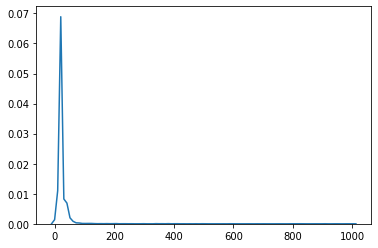

In [53]:
sns.kdeplot(core[core.batch_size < 1000].batch_size.values)